In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
from lmfit import Model
from scipy.stats import sem

In [10]:
# Questions
plot = input('Plot?')
save = input('Save?')
f = input('Include linear fit?')

# Variables for names and files
split = 'LSB_07'
metals = {'0G_13': 'Pt',
          '0G_14' : 'Al',
          '0G_15' : 'Mo',
          '0G_16' : 'Cr',
        }
measurements = {'Pt' : {},
                'Al' : {},
                'Mo' : {},
                'Cr' : {}
                }

# Linear Fit
def line(x, m, b):
    return x * m + b
gmodel = Model(line)
param = gmodel.make_params()

# Folder where the files are
data_path = os.path.join(Path.cwd().parent, 'Experiments', 'Data', 'Contact Resistance', split, 'LCR')
dict = {}
r_dict = {}
row_names = []
for i in os.listdir(data_path):
    files = os.listdir(os.path.join(data_path, i))
    for j in files:
        row_names.append(i + ' ' + j[:-4])
        data = pd.read_csv(os.path.join(data_path, i, j))
        dict[j] = (data['DC'], data['Idc'], data['Vds'])
        result = gmodel.fit(dict[j][1], param, m = 1, b = 1, x = dict[j][2])
        resistance = np.round(1 / result.values['m'], decimals = 2)
        r_square = 1 - result.residual.var() / np.var(dict[j][1])
        r_dict[metals[i] + ' ' + j[:-4]] = (float(resistance))
        
        
        measurements[metals[i]][j[:-4]] = (dict[j], resistance, r_square)
        
        if plot == 'y':

            fig, ax = plt.subplots(dpi = 400, facecolor = 'white')
            ax.set_title(metals[i] + ' ' + i + ' ' + j[:-4])
            ax.set_xlabel('Potential Vds (V)')
            ax.set_ylabel('Current Ids (A)')
            ax.scatter(dict[j][2], dict[j][1], s = 1, label = 'Measurement')
            ax.legend(markerscale = 5)

            if save == 'y':
                plt.savefig(os.path.join(Path.cwd().parent, 'Experiments', 'Data', 'Contact Resistance', split,
                            'Plots', i, metals[i] + ' ' + j[:-4]) + '.png', facecolor = 'white',  bbox_inches='tight')

            if f == 'y':
                

                fig, ax = plt.subplots(dpi = 400, facecolor = 'white')
                ax.set_title(metals[i] + ' ' + i + ' ' + j[:-4])
                ax.set_xlabel('Potential Vds (V)')
                ax.set_ylabel('Current Ids (A)')
                ax.scatter(dict[j][2], dict[j][1], s = 1, label = 'Measurement')
                ax.plot(dict[j][2], result.best_fit, alpha = 0.5, label = 'Linear Fit')
                ax.plot([],[], ' ', label = '{:.2f}'.format(resistance) + ' $\Omega$')
                ax.plot([],[], ' ', label = 'r$^2$ = ' + '{:.5f}'.format(r_square))
                ax.legend(markerscale = 5)

                if save == 'y':
                    plt.savefig(os.path.join(Path.cwd().parent, 'Experiments', 'Data', 'Contact Resistance', split,
                            'Plots', i, 'Fit_' + metals[i] + ' ' + j[:-4]) + '.png', facecolor = 'white',  bbox_inches='tight')



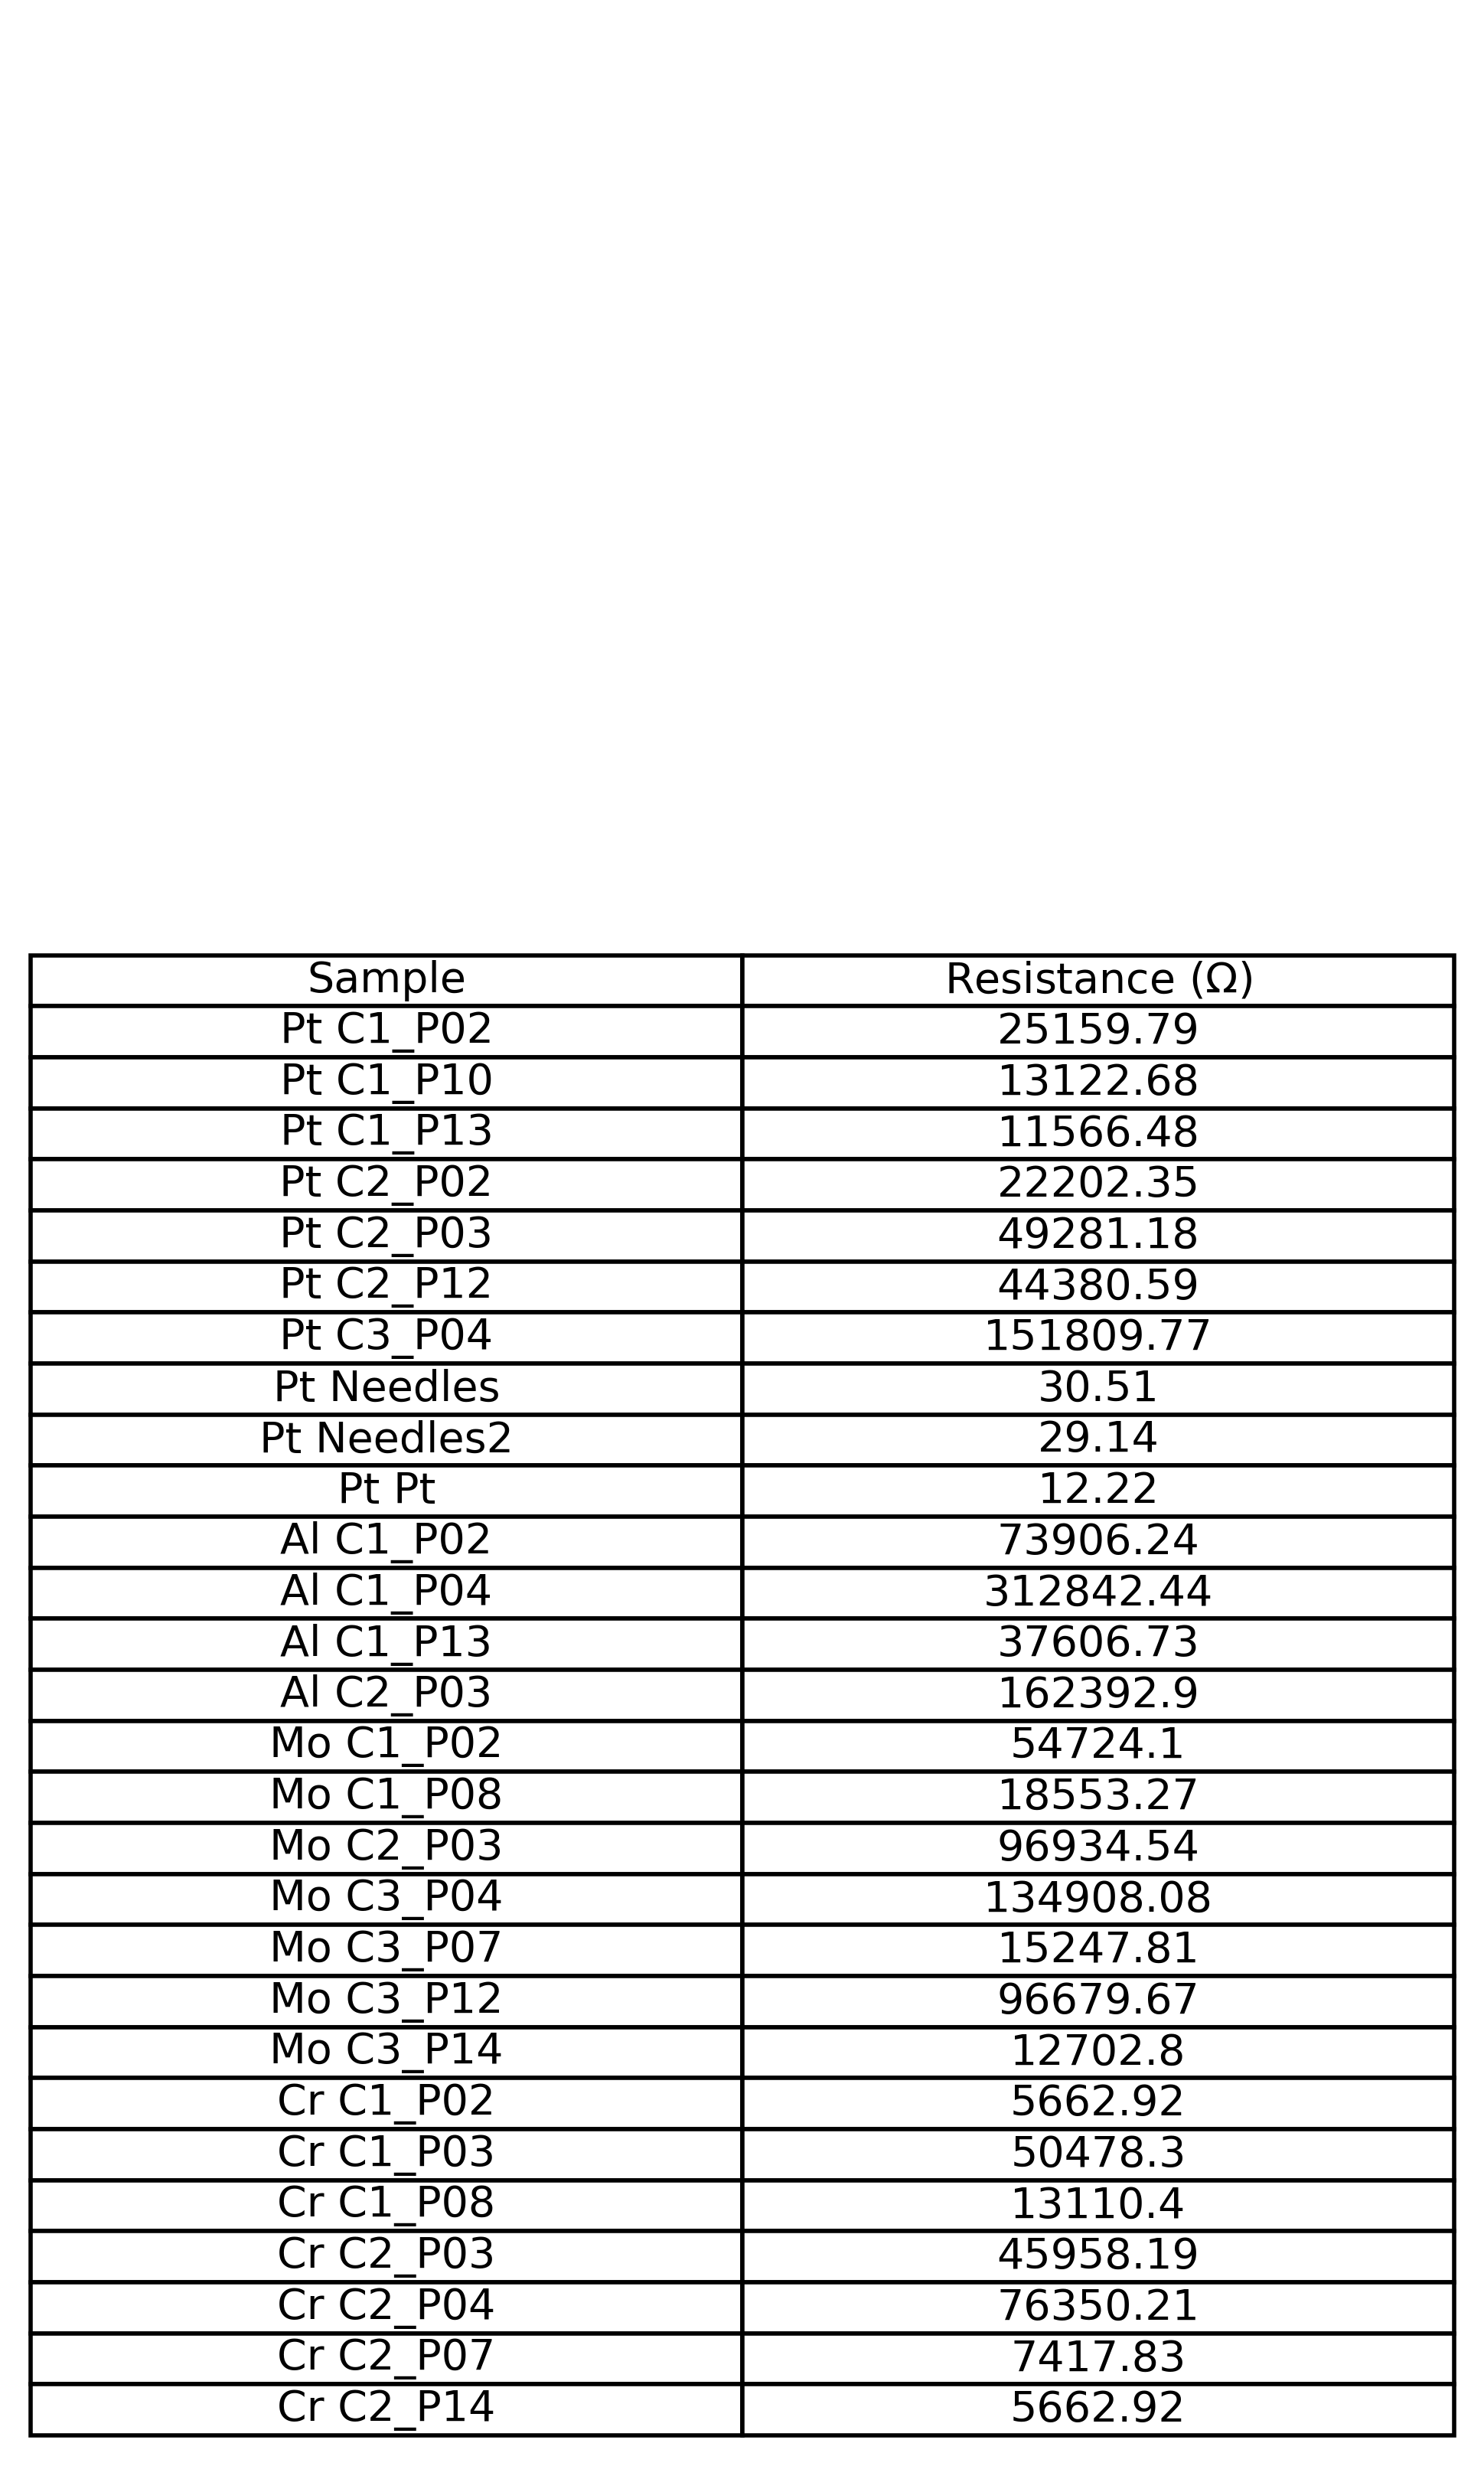

In [12]:

# Resistance table
resistance_table = pd.DataFrame(list(r_dict.items()), columns = ['Sample', 'Resistance (Ω)'])#, index = row_names)
fig, ax = plt.subplots(dpi = 400)
ax.axis('off')
t = ax.table(cellText=resistance_table.values, cellLoc='center', colLabels= ['Sample', 'Resistance ($\Omega$)'])

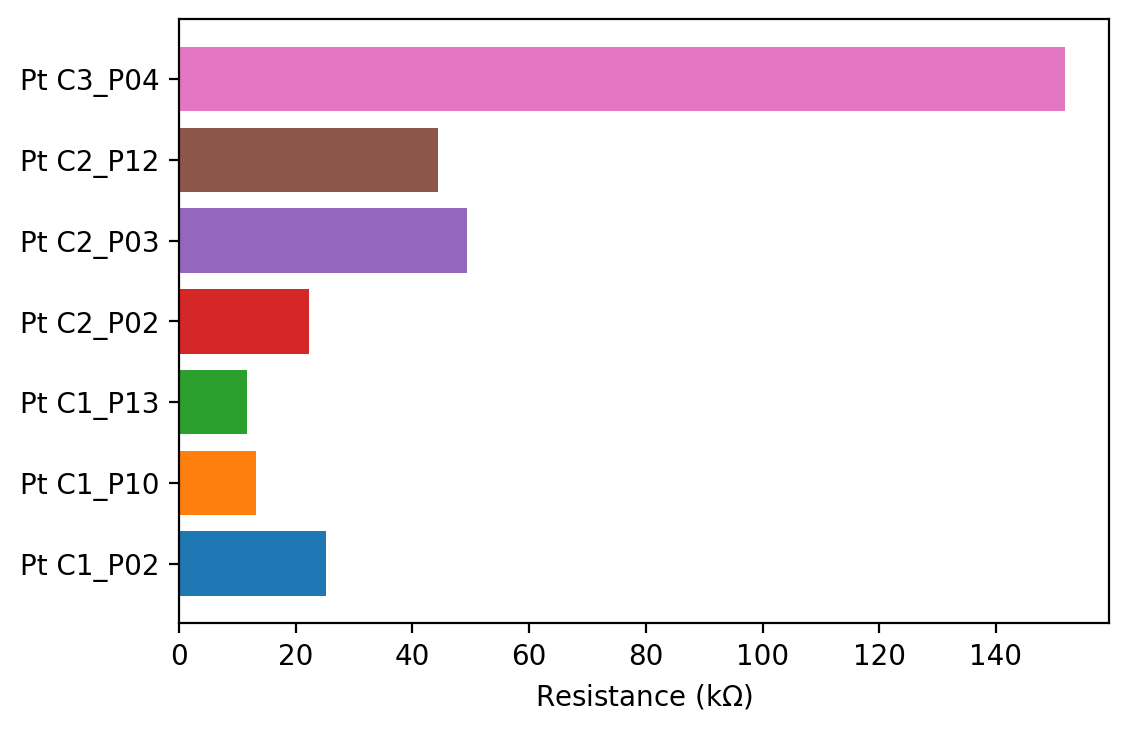

In [13]:
# Bar plot resistance
fig, ax = plt.subplots(dpi = 200, facecolor = 'white')
ax.set_xlabel('Resistance (k$\Omega$)')
#plt.yticks(fontsize=7)
for i in resistance_table.values:
    if i[1] > 100:
        #ax.barh(i[0], i[1] / 1000, height = 0.5)
        if 'Pt' in i[0]:
            ax.barh(i[0], i[1] / 1000)
    #plt.xticks(rotation='vertical')

#plt.savefig(os.path.join(Path.cwd().parent, 'Experiments', 'Data', 'Contact Resistance', split, 'Plots', 'P14_resistance') + '.png', facecolor = 'white',  bbox_inches='tight')

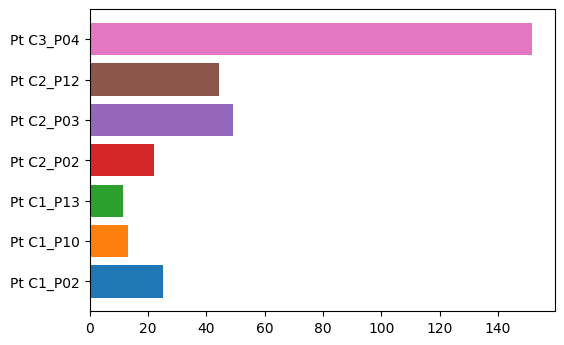

In [14]:
# Other bar plot

fig, ax = plt.subplots(dpi = 100, facecolor = 'white')
#plt.yticks(fontsize=5)
for i in measurements.keys():
    for j in measurements[i].keys():
        
        #fig, ax = plt.subplots(facecolor = 'white')
        #ax.set_title(str(i) + ' ' + j)
        #ax.scatter(measurements[i][j][0][2], measurements[i][j][0][1], s = 1)
        r_kohm = measurements[i][j][1] / 1000
        if 'Pt' in i + j and r_kohm > 10:
            ax.barh(i + ' ' + j, r_kohm)
        
    # ax.barh(i, me )
    # print(i)

2.62e+08
6.01e+08
2.87e+08
1.54e+08
--------------------------
3.26e+08 96067210.59196514
Relative standard error: 29.48061993701859 %


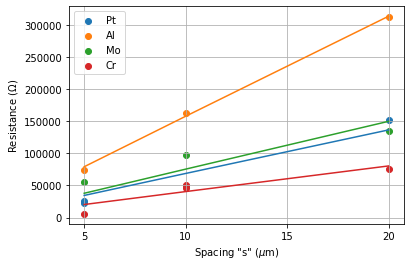

In [38]:
IDEA = {'P02' : {'S':5, 'W':5, 'L':3200, 'N':60},
        'P03' : {'S':10, 'W':5, 'L':3200, 'N':60},
        'P04' : {'S':20, 'W':5, 'L':3200, 'N':60},
        'P07' : {'S':10, 'W':5, 'L':5000, 'N':260},
        'P08' : {'S':20, 'W':5, 'L':5000, 'N':260},
        'P12' : {'S':5, 'W':5, 'L':3200, 'N':20},
        'P13' : {'S':5, 'W':5, 'L':3200, 'N':120},
        'P14' : {'S':5, 'W':5, 'L':3200, 'N':260},
        }

def idea_res(s, sigma):
    return s / (sigma * (60 * 5 + (60 - 1) * (2 * s + 3200)) * 0.2)

gmodel2 = Model(idea_res)
param2 = gmodel2.make_params(sigma = 5e-9)

x_Pt, y_Pt, x_Al, y_Al, x_Mo, y_Mo, x_Cr, y_Cr = [], [], [], [], [], [], [], []

resist_dict = {'P02':[], 'P03':[], 'P04':[]}

for j in measurements.keys():
    for i in measurements[j].keys():
        if 'P02' in i:
            resist_dict['P02'].append((j, measurements[j][i][1]))
        elif 'P03' in i:
            resist_dict['P03'].append((j, measurements[j][i][1]))
        elif 'P04' in i:
            resist_dict['P04'].append((j, measurements[j][i][1]))

for i in resist_dict.keys():
    for j in resist_dict[i]:
        if j[0] == 'Pt':
            x_Pt.append(IDEA[i]['S'])
            y_Pt.append(j[1])
        if j[0] == 'Al':
            x_Al.append(IDEA[i]['S'])
            y_Al.append(j[1])
        if j[0] == 'Mo':
            x_Mo.append(IDEA[i]['S'])
            y_Mo.append(j[1])
        if j[0] == 'Cr':
            x_Cr.append(IDEA[i]['S'])
            y_Cr.append(j[1])

fit_Pt, fit_Al, fit_Mo, fit_Cr = gmodel2.fit(y_Pt, param2, s = x_Pt), gmodel2.fit(y_Al, param2, s = x_Al), gmodel2.fit(y_Mo, param2, s = x_Mo), gmodel2.fit(y_Cr, param2, s = x_Cr)

fig, ax = plt.subplots(facecolor = 'white')
ax.set_ylabel('Resistance ($\Omega$)')
ax.set_xlabel('Spacing "s" ($\mu$m)')
ax.set_xticks([0,5,10, 15, 20])

ax.scatter(x_Pt, y_Pt, color = 'tab:blue', label = 'Pt')
ax.scatter(x_Al, y_Al, color = 'tab:orange', label = 'Al')
ax.scatter(x_Mo, y_Mo, color = 'tab:green', label = 'Mo')
ax.scatter(x_Cr, y_Cr, color = 'tab:red', label = 'Cr')

#Fit
ax.plot(x_Pt, fit_Pt.best_fit, color = 'tab:blue')
ax.plot(x_Al, fit_Al.best_fit, color = 'tab:orange')
ax.plot(x_Mo, fit_Mo.best_fit, color = 'tab:green')
ax.plot(x_Cr, fit_Cr.best_fit, color = 'tab:red')

ax.legend()
ax.grid()
resistivity = [1 / fit_Pt.values['sigma'], 1 / fit_Al.values['sigma'], 1 / fit_Mo.values['sigma'], 1 / fit_Cr.values['sigma']]
mean = sts.mean(resistivity)
stand_err = sem(resistivity)
for i in resistivity:
    print('{:.2e}'.format(i))
print('--------------------------')
print('{:.2e}'.format(mean), stand_err)
print('Relative standard error: ' + str(stand_err / mean * 100) + ' %')
